In [25]:
#@title Librerias
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import quad, fixed_quad, trapezoid, simpson,nquad
from sympy import symbols, diff, integrate, lambdify

# Parcial II - Métodos Computacionales (Integrales y Matrices)
**2024-2**

---

*Nombre:* Carolina Pabón Rúa

*Identificación:*1023625942

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub (en su carpeta) y recuerde hacer pull-request

# 1

**(20 puntos)**
Considera la siguiente integral:

$$
I = \int_0^1 \int_{x^2}^{x+1} \int_{y^2}^{y+2} \int_{z^2}^{z+3} (x+y+z+w) \, dw \, dz \, dy \, dx
$$

Encuentre la solución númerica usando unicamente `quad`. Encuentre el error relativo, para esto emplee el siguiente código que usa `nquad`:


```python
# Definir el integrando
integrand = lambda w, z, y, x: x + y + z + w

# Definir los límites usando funciones lambda
w_limits = lambda z, y, x: [z**2, z+3]
z_limits = lambda y, x: [y**2, y+2]
y_limits = lambda x: [x**2, x+1]
x_limits = lambda: [0, 1]

# Calcular la integral usando nquad
result, error = nquad(
    integrand,
    [w_limits, z_limits, y_limits, x_limits]
)

print(f"Resultado de la integral: {result}")
print(f"Error estimado: {error}")
```



In [44]:
integrand = lambda w, z, y, x: x + y + z + w
def integral_w(z,y,x):
  return quad(lambda w:x+y+z+w,z**2,z+3)[0]
def integral_z(y,x):
  return quad(lambda z: integral_w(z,y,x), y**2,y+2)[0]
def integral_y(x):
  return quad(lambda y: integral_z(y,x) , x**2, x+1)[0]
def integral_x():
  return quad(lambda x: integral_y(x),0,1)[0]

resultado_quad = integral_x()

w_limits = lambda z, y, x: [z**2, z+3]
z_limits = lambda y, x: [y**2, y+2]
y_limits = lambda x: [x**2, x+1]
x_limits = lambda: [0, 1]

resultado_nquad,error_nquad = nquad(integrand, [w_limits, z_limits,y_limits,x_limits])

error_relativo = resultado_nquad - resultado_quad

print(f'Resultado con quad: {resultado_quad} ')
print(f'Resultado con nquad: {resultado_nquad}')
print(f'Error relativo:{error_relativo}')


Resultado con quad: -0.6500971589021813 
Resultado con nquad: -0.6500971589021813
Error relativo:0.0


# 2

**(40 puntos)**
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo.


Para
* $a$ = 1,
* $I$ = 3,
* $μ0/4π$ = 1


Usando funciones explicitas explique claramente las entradas, salidas y procedimientos dentro de las mismas. Recuerde para resolver las integrales usar `quad` y grafique para:

*a)* $A_φ(r = 1.1, θ)$ vs. $0\leq θ\leq \pi$

*b)* $A_φ(r, θ = π∕3)$ vs. $0\leq r \leq 10$

Tenga cuidado con la convergencia de su integral



<ipython-input-41-171a1ea2799f>:29: RuntimeWarning: invalid value encountered in scalar divide
  return factor * ((2 - k2) * K(k) - 2 * E(k)) / k2


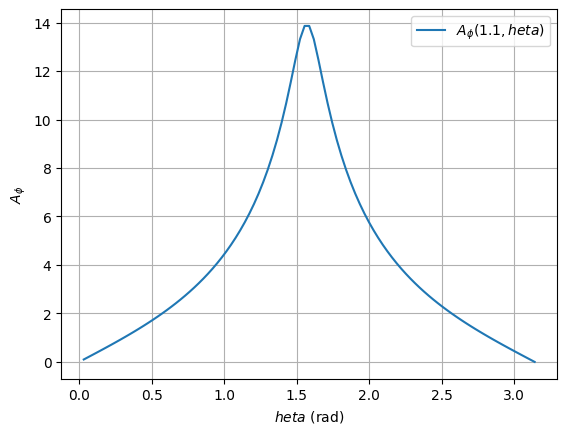

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Definir constantes
a = 1
I = 3
mu_0_4pi = 1

# Definir la función para k^2
def k_squared(r, theta):
    return (4 * a * r * np.sin(theta)) / (a**2 + r**2 + 2 * a * r * np.sin(theta))

# Integral elíptica completa del primer tipo K(k)
def K(k):
    integrand = lambda phi: 1 / np.sqrt(1 - k**2 * np.sin(phi)**2)
    return quad(integrand, 0, np.pi/2)[0]

# Integral elíptica completa del segundo tipo E(k)
def E(k):
    integrand = lambda phi: np.sqrt(1 - k**2 * np.sin(phi)**2)
    return quad(integrand, 0, np.pi/2)[0]

# Función para calcular A_phi(r, theta)
def A_phi(r, theta):
    k2 = k_squared(r, theta)
    k = np.sqrt(k2)
    factor = (mu_0_4pi * 4 * I * a) / np.sqrt(a**2 + r**2 + 2 * a * r * np.sin(theta))
    return factor * ((2 - k2) * K(k) - 2 * E(k)) / k2

'''a'''
thetas = np.linspace(0, np.pi, 100)
A_phi_theta = [A_phi(1.1, theta) for theta in thetas]

plt.figure()
plt.plot(thetas, A_phi_theta, label='$A_\phi(1.1, \theta)$')
plt.xlabel('$\theta$ (rad)')
plt.ylabel('$A_\phi$')
plt.legend()
plt.grid()
plt.show()





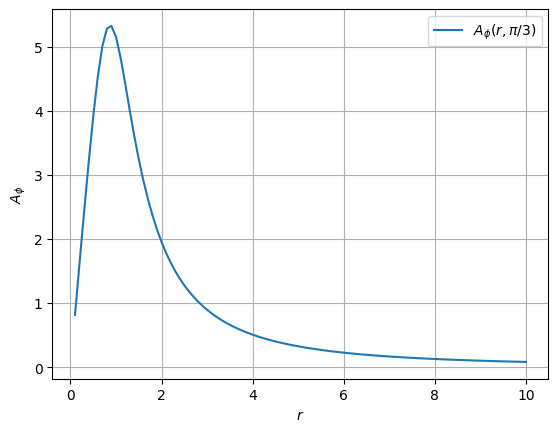

In [40]:
'''b'''
rs = np.linspace(0.1, 10, 100)
A_phi_r = [A_phi(r, np.pi/3) for r in rs]

plt.figure()
plt.plot(rs, A_phi_r, label='$A_\phi(r, \pi/3)$')
plt.xlabel('$r$')
plt.ylabel('$A_\phi$')
plt.legend()
plt.grid()
plt.show()

# 3

(**40 puntos**) El **método de la potencia inversa** es una técnica iterativa utilizada para calcular el autovalor de menor magnitud de una matriz cuadrada. Es una variante del **método de la potencia**, que normalmente encuentra el autovalor de mayor magnitud. Para ello, se aprovecha la propiedad de la matriz inversa:

$$ A^{-1} v = \frac{1}{\lambda} v $$


## Algoritmo

El método de la potencia inversa sigue los siguientes pasos:

1. Elegir un vector inicial $x^{(0)}$ no nulo.

2. Para cada iteración $k$, resolver el sistema lineal:
   
   $$ A y^{(k)} = x^{(k-1)} $$
   
   donde $y^{(k)}$ es un **vector intermedio** que se obtiene resolviendo el sistema lineal. Este vector representa la solución del sistema en cada iteración y es crucial para aproximar el autovector de menor autovalor.

3. Normalizar $y^{(k)}$ para obtener un nuevo vector de iteración:
   
   $$ x^{(k)} = \frac{y^{(k)}}{\| y^{(k)} \|} $$
   
4. Aproximar el autovalor mediante el cociente de Rayleigh:
   
   $$ \lambda^{(k)} = \frac{(x^{(k)})^T A x^{(k)}}{(x^{(k)})^T x^{(k)}} $$
   
5. Repetir los pasos anteriores hasta que la diferencia entre valores sucesivos de $\lambda$ sea menor que un umbral de tolerancia.

---

*a)* Escriba una función llamada `potencia_inversa` que dada una matriz A encuentre su valor propio menos dominante (con una tolerancia de 1e-7 usando la norma Euclidiana) y su correspondiente autovector. Para obtener $y^{(k)}$ puede emplear `np.linalg.solve` recordando que $Ay = x$.

*b)* Usando la matriz A, encuentre el $\lambda_{min}$ y el correspondiente autovector. Examine la convergencia de su autovalor en función de las iteraciones, esto es, haga un gráfico de $\lambda(k)$

$$
\begin{bmatrix}
5 & 2 \\
2 & 2
\end{bmatrix}
$$

*c)* Compare su resultado con `np.linalg.eig`

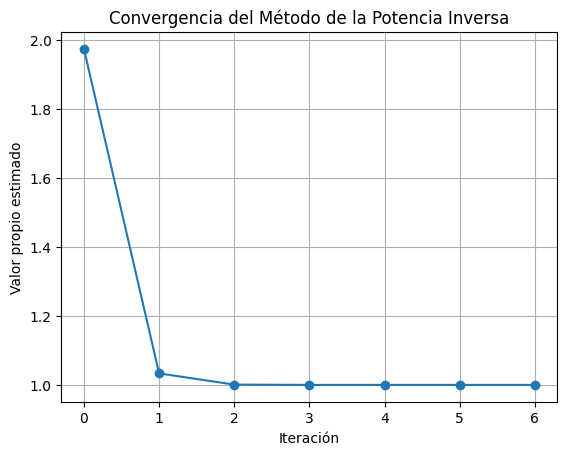

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def potencia_inversa(A, tol=1e-7, max_iter=1000):
    n = A.shape[0]
    x = np.random.rand(n)
    x /= np.linalg.norm(x)

    lambdas = []
    for _ in range(max_iter):
        y = np.linalg.solve(A, x)
        x = y / np.linalg.norm(y)
        lambda_k = x.T @ A @ x
        lambdas.append(lambda_k)

        if len(lambdas) > 1 and abs(lambdas[-1] - lambdas[-2]) < tol:
            break

    return lambda_k, x, lambdas


A = np.array([[5, 2],
              [2, 2]])


lambda_min, eigenvector, lambdas = potencia_inversa(A)


plt.plot(lambdas, marker='o', linestyle='-')
plt.xlabel('Iteración')
plt.ylabel('Valor propio estimado')
plt.title('Convergencia del Método de la Potencia Inversa')
plt.grid()
plt.show()


valores_propios, vectores_propios = np.linalg.eig(A)
lambda_min_numpy = np.min(valores_propios)
vector_min_numpy = vectores_propios[:, np.argmin(valores_propios)]




In [47]:
print(f"Autovalor estimado: {lambda_min}")
print(f"Autovector estimado: {eigenvector}")
print(f"Autovalor real: {lambda_min_numpy}")
print(f"Autovector real: {vector_min_numpy}")

Autovalor estimado: 1.0000000020557391
Autovector estimado: [-0.44719546  0.89443626]
Autovalor real: 1.0
Autovector real: [-0.4472136   0.89442719]


#4

**(10 puntos)**
Sea $A$ una matriz cuadrada de tamaño $n \times n$. Se sabe que el determinante de una matriz es igual al producto de sus autovalores:

$$
\det(A) = \prod_{i=1}^{n} \lambda_i
$$

donde $\lambda_1, \lambda_2, \dots, \lambda_n$ son los autovalores de $A$.

Usando una matriz aleatoria $A$ de $5\times 5$, demuestre esta propiedad. Puede usar las funciones de `np.linalg`.

In [45]:
A = [[2,4,6,8,2],[1,-3,5,7,1],[1,2,3,4,5],[6,7,8,9,3],[2,1,1,6,4]]
det_A = np.linalg.det(A)
print(f'El determinante de A es {det_A}')
auto_valoresA= np.linalg.eigvals(A)
det_autovals = np.prod(auto_valoresA)
print(f'El determinante por autovalores es de {det_autovals}')
print(np.isclose(det_A , det_autovals))

El determinante de A es 2640.0
El determinante por autovalores es de (2639.999999999998+1.0344230260817518e-13j)
True
